# Introducción a Tidyverse

Este Jupyter Notebook será la intro al paquete tidyverse. Usaremos un dataset sencillo y nos centraremos en las funciones más importantes. Lo primero es instalar el paquete:

In [2]:
install.packages(c("tidyverse","palmerpenguins"))


Installing packages into ‘/usr/local/lib/R/4.1/site-library’
(as ‘lib’ is unspecified)



La instalación se realiza solo una vez. Con la función `library` la llamamos:

In [3]:
library(tidyverse) # cargamos las librerias
library(palmerpenguins)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



La función `data` nos deja cargar datasets de los paquetes, en este caso el dataset `penguins`

In [20]:
data(package = 'palmerpenguins')


## 1) Echar un vistazo

Lo primero antes de trabajar con un dataset es darle un primer vistazo. Funciones útiles para esto son `glimpse`, `head`, y `tail`

In [21]:
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


`glimpse` nos da información sobre el tipo de datos:

* logical vectors <lgl> contiene TRUE o FALSE
* integer vectors <int> contiene enteros
* double vectors <dbl> contiene números reales
* character vector <chr> contiene strings ("") 
* factors <fct>, representan variables categóricas determinadas (llamadas levels)

In [22]:
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


`head` nos entrega las primeras filas y `tail` las últimas

`head`, y `tail` son funciones que tienen argumentos. En este caso `n = número de filas por mostrar`

In [23]:
tail(penguins, n = 3)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Chinstrap,Dream,49.6,18.2,193,3775,male,2009
Chinstrap,Dream,50.8,19.0,210,4100,male,2009
Chinstrap,Dream,50.2,18.7,198,3775,female,2009


## 2) Manipular datos

Acá revisaremos funciones que nos dejar manipular el dataset y resumir información. Funciones útiles para esto son `mutate`, `filter`, `group_by`, y `select`. Además del operador `%>%`.

### Operador `%>%`

A veces mentalmente se traduce como "y luego...". La idea es encadenar una secuencia de funciones de forma que sea fácil leerla.


In [24]:
yo_a_las_6am %>%
    me_levanto %>%
    me_visto %>%
    tomo_desayuno 

ERROR: Error in tomo_desayuno(.): could not find function "tomo_desayuno"


La idea es hacer el código fluido. Al igual que el ejemplo **el orden es muy importante**.
    

### Pregunta: Cuales son los pesos promedios de las hembras por isla?

Primero es útil la abstracción mental:

In [ ]:
penguins %>%
    selecciono_los_pesos_de_las_hembras %>%
    agrupo_por_isla %>%
    promedio_los_pesos

Ahora con los pasos definidos, usamos `filter`, `group_by`, y `mean`. Además del operador `%>%`.

In [34]:
penguins %>%
    filter(sex == "female") %>% 
    group_by(island) %>%
    summarize(promedio_hembras = mean(body_mass_g))

island,promedio_hembras
<fct>,<dbl>
Biscoe,4319.375
Dream,3446.311
Torgersen,3395.833


## 3) Funciones `mutate()`,  `filter()`, `group_by()`, `select()`, `rename()`,`arrange()` y otras

### `mutate()` crea o modifica una nueva variable

In [8]:
penguins %>% 
    mutate(razon_bill_length_depth = bill_length_mm / bill_depth_mm)%>% 
    tail(n = 3)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,razon_bill_length_depth
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>
Chinstrap,Dream,49.6,18.2,193,3775,male,2009,2.725275
Chinstrap,Dream,50.8,19.0,210,4100,male,2009,2.673684
Chinstrap,Dream,50.2,18.7,198,3775,female,2009,2.684492


### `recode()`  modifica una variable de forma rápida

In [14]:
penguins %>% 
    mutate(sex = recode(sex, male = "macho", female = "hembra"))%>% 
    tail(n = 3)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Chinstrap,Dream,49.6,18.2,193,3775,macho,2009
Chinstrap,Dream,50.8,19.0,210,4100,macho,2009
Chinstrap,Dream,50.2,18.7,198,3775,hembra,2009


### `filter()`  retiene filas que cumplen con las condiciones que indica

In [57]:
penguins %>% 
    filter(sex == "female") %>% 
    tail(n = 3)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Chinstrap,Dream,45.7,17.0,195,3650,female,2009
Chinstrap,Dream,43.5,18.1,202,3400,female,2009
Chinstrap,Dream,50.2,18.7,198,3775,female,2009


### Para usar `filter()`  es útil conocer los operadores para indicar las condiciones:
* ==, >, >= etc.

* &, |, !

* is.na()

* between(), near()

Veamos unos ejemplos de operadores antes de seguir

In [45]:
penguins %>% # operador ! indica logical negation (NOT) y operador & indica logical AND
    filter(!sex == "female" &  between(body_mass_g,3000,3300))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Gentoo,Biscoe,46.5,14.8,217,5200,female,2008
Gentoo,Biscoe,45.2,14.8,212,5200,female,2009


In [56]:
penguins %>% # is.na() filtra las filas con NA y operador & indica logical OR
    filter(is.na(sex) | is.na(body_mass_g))

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,34.1,18.1,193,3475,NA,2007
Adelie,Torgersen,42.0,20.2,190,4250,NA,2007
Adelie,Torgersen,37.8,17.1,186,3300,NA,2007
Adelie,Torgersen,37.8,17.3,180,3700,NA,2007
Adelie,Dream,37.5,18.9,179,2975,NA,2007
Gentoo,Biscoe,44.5,14.3,216,4100,NA,2007
Gentoo,Biscoe,46.2,14.4,214,4650,NA,2008
Gentoo,Biscoe,47.3,13.8,216,4725,NA,2009


### `group_by()`  agrupa variables para las siguientes operaciones. `ungroup()` termina la función

In [67]:
penguins %>% 
    group_by(sex) %>%
    summarize(promedio = mean(body_mass_g))%>%
    ungroup()

sex,promedio
<fct>,<dbl>
female,3862.273
male,4545.685
NA,NA


### Ahora podemos combinar  `filter()` y  `mutate()` 

In [66]:
penguins %>% 
    filter(!is.na(sex) & !is.na(body_mass_g))%>% 
    group_by(sex) %>%
    summarize(promedio = mean(body_mass_g)) %>%
    ungroup()

sex,promedio
<fct>,<dbl>
female,3862.273
male,4545.685


###  `ungroup()` es importante!!

In [84]:
penguins %>% 
  group_by(sex) %>% 
  mutate(promedio_body_mass_g = mean(body_mass_g)) %>%    # calcula el promedio de peso de males y females
  mutate(promedio_bill_depth = mean(bill_depth_mm)) %>%  # calcula el promedio de bill_depth de males y females
  ungroup() %>% 
  tail(n = 6) # cerrando con ungroup() 


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,promedio_body_mass_g,promedio_bill_depth
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>
Chinstrap,Dream,45.7,17.0,195,3650,female,2009,3862.273,16.42545
Chinstrap,Dream,55.8,19.8,207,4000,male,2009,4545.685,17.89107
Chinstrap,Dream,43.5,18.1,202,3400,female,2009,3862.273,16.42545
Chinstrap,Dream,49.6,18.2,193,3775,male,2009,4545.685,17.89107
Chinstrap,Dream,50.8,19.0,210,4100,male,2009,4545.685,17.89107
Chinstrap,Dream,50.2,18.7,198,3775,female,2009,3862.273,16.42545


### Para contar grupos usamos `tally()` 

In [88]:
penguins %>% 
  group_by(sex, island) %>%
  tally(sort = TRUE) # sort = TRUE ordena de mayor a menor 

sex,island,n
<fct>,<fct>,<int>
male,Biscoe,83
female,Biscoe,80
male,Dream,62
female,Dream,61
female,Torgersen,24
male,Torgersen,23
NA,Biscoe,5
NA,Torgersen,5
NA,Dream,1


### Trabajar con `group_by()` es útil en conjunto a `summarise()`

In [91]:
penguins %>% 
  group_by(sex, island) %>%
  summarise(
    n = n(),
    promedio_peso = mean(body_mass_g, na.rm = TRUE)
  )

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,island,n,promedio_peso
<fct>,<fct>,<int>,<dbl>
female,Biscoe,80,4319.375
female,Dream,61,3446.311
female,Torgersen,24,3395.833
male,Biscoe,83,5104.518
male,Dream,62,3987.097
male,Torgersen,23,4034.783
NA,Biscoe,5,4587.500
NA,Dream,1,2975.000
NA,Torgersen,5,3681.250


### Para terminar, un operador extra `%in%`, y ggplot
*  `%in%`  se traduce como "me quiero quedar con estos atributos"
*  `ggplot`  es la función base de tidyverse para graficar

### Misión: graficar que tan diferente es la masa de las hembras en dos islas: Biscoe y Dream

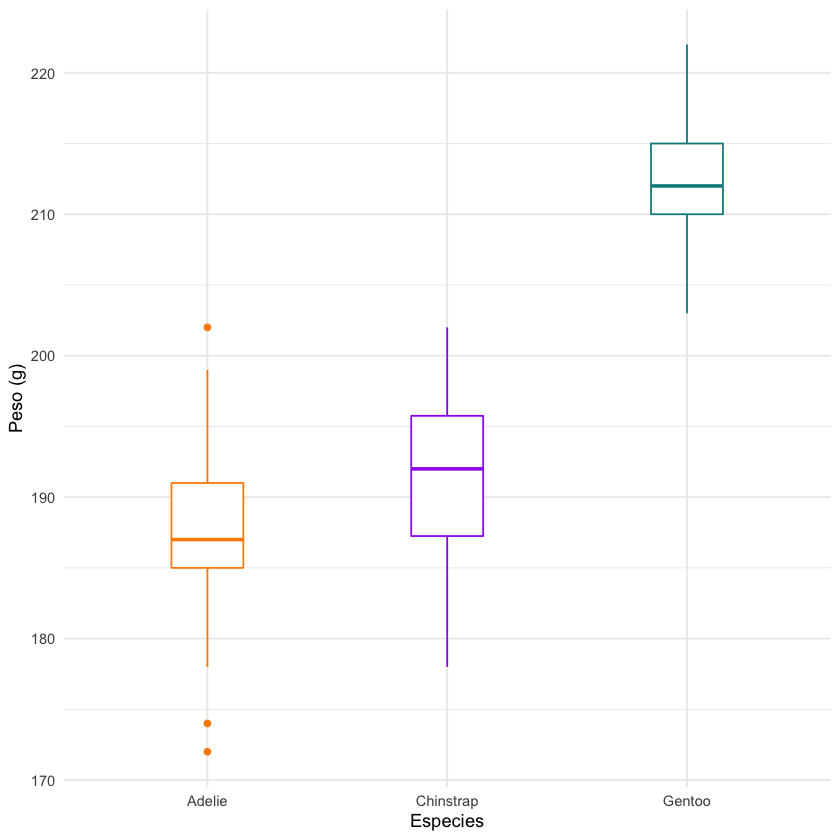

In [106]:
penguins %>% 
  filter(island %in% c("Biscoe", "Dream") & sex == "female") %>%
  ggplot(aes(x = species, y = flipper_length_mm)) +
  geom_boxplot(aes(color = species), width = 0.3, show.legend = FALSE) +
  scale_color_manual(values = c("darkorange","purple","cyan4")) +
  theme_minimal() +
  labs(x = "Especies",
       y = "Peso (g)")